In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz


### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    What is the probability that no cars drive up in the noon hour?
    What is the probability that 3 or more cars come through the drive through?
    How likely is it that the drive through gets at least 1 car?

Text(0.5, 1.0, 'Poisson distribution $λ = 1$')

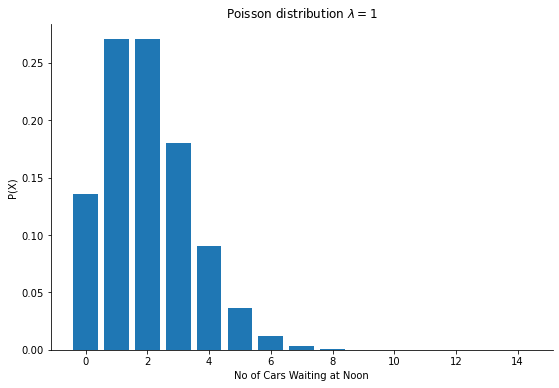

In [88]:
λ = 2

x = np.arange(0,15)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('No of Cars Waiting at Noon')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 1$')

In [89]:
# 1b. What is the probability that no cars drive up in the noon hour?

# 14% probability that no cars drive up in the noon hour
stats.poisson(λ).pmf(0).round(2)

0.14

In [90]:
# 1c. What is the probability that 3 or more cars come through the drive through?

# 32% probability that 3 or more cars come through the drive-thru
lambda_of_cars = stats.poisson(λ)
lambda_of_cars.sf(2).round(2)

0.32

In [91]:
# 1d. How likely is it that the drive through gets at least 1 car?

# 41% probability that the drive-thru sees at least 1 car
lambda_of_cars.cdf(1).round(2)

0.41

### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
    - Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

In [92]:
# 2. 

mean = 3
std_dev = 0.3

In [93]:
# 2a. What grade point average is required to be in the top 5% of the graduating class?

# 3.49 GPA = top 5% of class
university = stats.norm(mean, std_dev)
university.isf(0.05).round(2)

3.49

In [94]:
# 2b. What GPA constitutes the bottom 15% of the class?

# 2.69 GPA
university.ppf(0.15).round(2)

2.69

In [95]:
#  2d. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile.
# 3rd Decile from Bottom is in range of 2.75 - 2.84 GPA

# Would a student with a 2.8 grade point average qualify for this scholarship?
# Yes, a 2.8 GPA would qualify for this scholarship


bottom_10 = university.ppf(.1) # 2.62 GPA represents the top 10% of class
top_10 = university.isf(.1) # 3.38 GPA represents the top 10% of class

In [96]:
university.ppf((0.2, 0.3))

array([2.74751363, 2.84267985])

In [97]:
# "quantile" approach -- probably not correct ***

var = np.array([bottom_10, top_10])
quantiles = np.percentile(var, np.arange(0, 101, 10))
quantile_df = pd.DataFrame(quantiles)
quantile_df = quantile_df[0][::-1] # reversing the order of the column, placing highest quantile first in the order

quantile_df


10    3.384465
9     3.307572
8     3.230679
7     3.153786
6     3.076893
5     3.000000
4     2.923107
3     2.846214
2     2.769321
1     2.692428
0     2.615535
Name: 0, dtype: float64

In [98]:
# 2e. If I have a GPA of 3.5, what percentile am I in?

# 95% percentile
university.cdf(3.5).round(2)

0.95

### 3. A marketing website has...
    - an average click-through rate of 2%
    - One day they observe 4326 visitors and 97 click-throughs
    - How likely is it that this many people or more click through?

In [107]:
# 3. binomial distribution

# How likely is it that this many people or more click through?

# 88% probability that there are 97 or more click throughs given the 4326 number of visitors 

n_trials = 4326
p = 0.02

clicks = stats.binom(n_trials, p)
clicks.cdf(97).round(2)

0.88